Inisialisasi Library

In [1]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import ast
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kinan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Baca Dataset

In [2]:
# Load Dataset Kilang Minyak 
df = pd.read_csv('tweets-data/kilang_minyak_data.csv')
# Load Dataset chatwords (informal → formal)
df_stopwords = pd.read_csv('dataset/data_text_informal_to_formal.csv', sep=';')

Casefolding dan Text Cleaning

In [3]:
def clean_text(text):
    if not isinstance(text, str):
        text = str(text)
    text = text.lower()                             # ubah ke huruf kecil
    text = re.sub(r'http\S+|www\.\S+', '', text)    # hapus URL
    text = re.sub(r'@\w+', '', text)                # hapus mention (@username)
    text = re.sub(r'#\w+', '', text)                # hapus hashtag (#hashtag)
    text = re.sub(r'[^a-z\s]', '', text)            # hapus karakter non-huruf
    text = re.sub(r'\s+', ' ', text).strip()        # hapus spasi berlebih
    return text

df['cleaned_text'] = df['full_text'].apply(clean_text)
df[['full_text', 'cleaned_text']].head(10)


,full_text,cleaned_text
0,@luckylucky0971 @PaltiHutabarat Indonesia Emas...,indonesia emas pak presiden bangun industri ot...
1,@MMicen @BosPurwa Dengarkan baik2 kata2 yang d...,dengarkan baik kata yang dia ucapkan udah jela...
2,@dhaintly Kalau bikin kilang otomatis gk ada p...,kalau bikin kilang otomatis gk ada proyek impo...
3,Impor BBM Bebani APBN Purbaya Sebut Pertamina ...,impor bbm bebani apbn purbaya sebut pertamina ...
4,@Dennysiregar7 @pertamina @NasbiHasan Jadi kap...,jadi kapan pertamina akan mulai membangun kila...
5,@DS_yantie @desmodromici1 @NasbiHasan harus me...,harus membangun kilang minyak secepatnya
6,@regar_op0sisi Sudah dari zaman orba ga ada ki...,sudah dari zaman orba ga ada kilang pada waktu...
7,@dhaintly Issu ini dr dulu udah jadi bahan deb...,issu ini dr dulu udah jadi bahan debat capres ...
8,@CakKhum Da mah yaaaaa harusnya mah ga usah bu...,da mah yaaaaa harusnya mah ga usah buru bangun...
9,Seharusnya dari dulu udah bikin kilang minyak ...,seharusnya dari dulu udah bikin kilang minyak ...


Handling Chatwords dan Stopword

In [4]:

formal_text = df_stopwords.set_index('transformed')['original-for'].to_dict()

# Fungsi untuk mengganti kata chatwords
def replace_chatwords(text):
    words = text.split()
    replaced_words = [formal_text.get(word, word) for word in words]
    return ' '.join(replaced_words)

df['cleaned_text'] = df['cleaned_text'].apply(replace_chatwords)

# Stopword removal menggunakan Sastrawi

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
df['cleaned_text'] = df['cleaned_text'].apply(stopword.remove)

# Cek hasil
df[['full_text', 'cleaned_text']].head()


,full_text,cleaned_text
0,@luckylucky0971 @PaltiHutabarat Indonesia Emas...,indonesia emas pak presiden bangun industri ot...
1,@MMicen @BosPurwa Dengarkan baik2 kata2 yang d...,dengarkan baik kata ucapkan udah jelas fokus d...
2,@dhaintly Kalau bikin kilang otomatis gk ada p...,kalau bikin kilang otomatis ada proyek import ...
3,Impor BBM Bebani APBN Purbaya Sebut Pertamina ...,impor bbm bebani apbn purbaya sebut pertamina ...
4,@Dennysiregar7 @pertamina @NasbiHasan Jadi kap...,jadi kapan pertamina mulai membangun kilang co...


Tokenizer

In [5]:
df['tokenized_text'] = df['cleaned_text'].apply(word_tokenize)
df[['cleaned_text', 'tokenized_text']].head()

,cleaned_text,tokenized_text
0,indonesia emas pak presiden bangun industri ot...,"[indonesia, emas, pak, presiden, bangun, indus..."
1,dengarkan baik kata ucapkan udah jelas fokus d...,"[dengarkan, baik, kata, ucapkan, udah, jelas, ..."
2,kalau bikin kilang otomatis ada proyek import ...,"[kalau, bikin, kilang, otomatis, ada, proyek, ..."
3,impor bbm bebani apbn purbaya sebut pertamina ...,"[impor, bbm, bebani, apbn, purbaya, sebut, per..."
4,jadi kapan pertamina mulai membangun kilang co...,"[jadi, kapan, pertamina, mulai, membangun, kil..."


Stemming

In [6]:
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

def stem_text(word_list):
    # Kalau input berupa string, ubah jadi list dulu
    if isinstance(word_list, str):
        try:
            word_list = ast.literal_eval(word_list)  # parse string list
        except:
            word_list = word_list.split()  # fallback split biasa
    if not isinstance(word_list, list):
        return []
    return [stemmer.stem(word) for word in word_list]

df['stemmed_text'] = df['tokenized_text'].apply(stem_text)
df[['tokenized_text', 'stemmed_text']].head(10)


,tokenized_text,stemmed_text
0,"[indonesia, emas, pak, presiden, bangun, indus...","[indonesia, emas, pak, presiden, bangun, indus..."
1,"[dengarkan, baik, kata, ucapkan, udah, jelas, ...","[dengar, baik, kata, ucap, udah, jelas, fokus,..."
2,"[kalau, bikin, kilang, otomatis, ada, proyek, ...","[kalau, bikin, kilang, otomatis, ada, proyek, ..."
3,"[impor, bbm, bebani, apbn, purbaya, sebut, per...","[impor, bbm, beban, apbn, purbaya, sebut, pert..."
4,"[jadi, kapan, pertamina, mulai, membangun, kil...","[jadi, kapan, pertamina, mulai, bangun, kilang..."
5,"[membangun, kilang, minyak, secepatnya]","[bangun, kilang, minyak, cepat]"
6,"[dari, zaman, orba, ada, kilang, waktu, indone...","[dari, zaman, orba, ada, kilang, waktu, indone..."
7,"[issu, dulu, udah, jadi, bahan, debat, capres,...","[issu, dulu, udah, jadi, bahan, debat, capres,..."
8,"[da, mah, iya, harusnya, mah, usah, buru, bang...","[da, mah, iya, harus, mah, usah, buru, bangun,..."
9,"[dari, dulu, udah, bikin, kilang, minyak, bany...","[dari, dulu, udah, bikin, kilang, minyak, bany..."


Lexicon Labeling

In [7]:
# Baca TSV lexicon
positive = pd.read_csv("dataset/positive.tsv", sep="\t", header=None, encoding="utf-8", skiprows=1)
negative = pd.read_csv("dataset/negative.tsv", sep="\t", header=None, encoding="utf-8", skiprows=1)

# Buat dictionary dengan value float
pos_dict = {k: float(v) for k, v in zip(positive[0], positive[1])}
neg_dict = {k: float(v) for k, v in zip(negative[0], negative[1])}

# Fungsi labeling
def label_with_inset(text):
    score = 0.0
    for w in text.split():
        if w in pos_dict:
            score += pos_dict[w]
        elif w in neg_dict:
            score += neg_dict[w]
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

# Gabungkan stemmed list menjadi string
df['stemmed_text_str'] = df['stemmed_text'].apply(lambda x: ' '.join(x))
df["sentiment"] = df["stemmed_text_str"].apply(label_with_inset)

# Cek distribusi sentimen
print(df["sentiment"].value_counts())


sentiment
negative    1323
positive    1067
neutral      124
Name: count, dtype: int64


Visualisasi Distribusi Sentimen

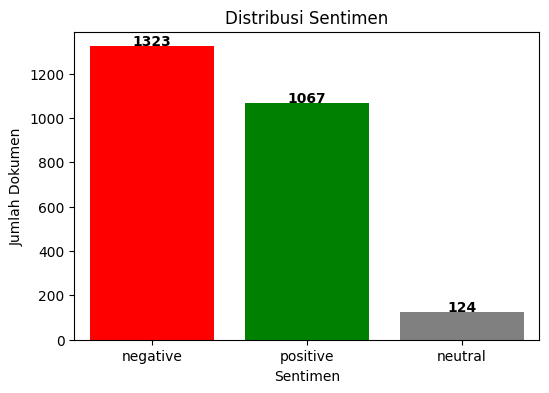

In [8]:

# Hitung jumlah tiap label
sentiment_counts = df['sentiment'].value_counts()

# Warna manual sesuai label
colors = ['red' if x=='negative' else 'green' if x=='positive' else 'gray' for x in sentiment_counts.index]

plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, color='blue')  

# Ganti warna manual & tambahkan jumlah di atas bar
for i, bar in enumerate(plt.gca().patches):
    bar.set_facecolor(colors[i])
    plt.text(i, bar.get_height() + 5, str(int(bar.get_height())), ha='center', fontweight='bold')

plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Dokumen')
plt.show()
